# Statistical Moments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from datasets import load_dataset

bigds = load_dataset("SandipPalit/Movie_Dataset")

In [3]:
bigdata = bigds["train"].to_pandas()

In [4]:
bigdata.head()

Release Date                        Title  \
0   1902-01-01  Agnes May Turner on a Swing   
1   1902-01-01       Scarlet Macaw on Perch   
2   1907-12-27                     Kiri-Kis   
3   1915-02-08        The Birth of a Nation   
4   1916-08-07                     One A.M.   

                                            Overview  \
0     Agnes May Turner on a swing, early color film.   
1       Scarlet Macaw on a perch,  early color film.   
2  A family troupe of acrobats, made up to appear...   
3  Two families, abolitionist Northerners the Sto...   
4  A drunken homeowner has a difficult time getti...   

                         Genre  Vote Average  Vote Count  
0              ['Documentary']           0.0           0  
1              ['Documentary']           0.0           0  
2        ['Comedy', 'Fantasy']           7.0          25  
3  ['Drama', 'History', 'War']           6.1         404  
4                   ['Comedy']           6.8          83

In [5]:
original_df = pd.read_csv('path')
synthetic_df = pd.read_csv('path') # MVAE-EA dataset
CTGAN_df = pd.read_csv('path')
DPGAN_df = pd.read_csv('path')
GPT_df = pd.read_csv('path')

In [6]:
original_df = original_df.drop('Unnamed: 0', axis=1)
original_df.head()


Review  Rating
0  Mismatched travellers are stranded overnight a...     8.0
1  In 1900, strong-willed widow Lucy Muir goes to...     7.7
2  In 1867, a gang led by James "Stretch" Dawson ...     6.9
3  Reclusive Dr. Zorba has died and left his mans...     5.8
4  The twisted Richard III is haunted by the ghos...     6.2

In [7]:

# Mean
original_mean = original_df['Rating'].mean()
synthetic_mean = synthetic_df['Rating'].mean()
CTGAN_mean = CTGAN_df['Rating'].mean()
DPGAN_mean = DPGAN_df['Rating'].mean()

# Variance
original_var = original_df['Rating'].var()
synthetic_var = synthetic_df['Rating'].var()
CTGAN_var = CTGAN_df['Rating'].var()
DPGAN_var = DPGAN_df['Rating'].var()

# Skewness
original_skew = original_df['Rating'].skew()
synthetic_skew = synthetic_df['Rating'].skew()
CTGAN_skew = CTGAN_df['Rating'].skew()
DPGAN_skew = DPGAN_df['Rating'].skew()


# Kurtosis
original_kurt = original_df['Rating'].kurtosis()
synthetic_kurt = synthetic_df['Rating'].kurtosis()
CTGAN_kurt = CTGAN_df['Rating'].kurtosis()
DPGAN_kurt = DPGAN_df['Rating'].kurtosis()

print("Original Data - Mean: ", original_mean, ", Variance: ", original_var, ", Skewness: ", original_skew, ", Kurtosis: ", original_kurt)
print("MVAE-EA Data - Mean: ", synthetic_mean, ", Variance: ", synthetic_var, ", Skewness: ", synthetic_skew, ", Kurtosis: ", synthetic_kurt)
print("CTGAN Data - Mean: ", CTGAN_mean, ", Variance: ", CTGAN_var, ", Skewness: ", CTGAN_skew, ", Kurtosis: ", CTGAN_kurt)
print("DPGAN Data - Mean: ", DPGAN_mean, ", Variance: ", DPGAN_var, ", Skewness: ", DPGAN_skew, ", Kurtosis: ", DPGAN_kurt)

Original Data - Mean:  5.42920792079208 , Variance:  3.097209296612044 , Skewness:  -0.20539157590744817 , Kurtosis:  0.43026999103362407
MVAE-EA Data - Mean:  5.4176418074357455 , Variance:  3.1281815934208264 , Skewness:  -0.22199404416394677 , Kurtosis:  0.37877634792639725
CTGAN Data - Mean:  5.877165322932292 , Variance:  10.449020070720188 , Skewness:  -0.10063930833382811 , Kurtosis:  -0.33433017873659
DPGAN Data - Mean:  5.052253978712871 , Variance:  4.451332645777104 , Skewness:  0.307519921147936 , Kurtosis:  -0.9063568981120502


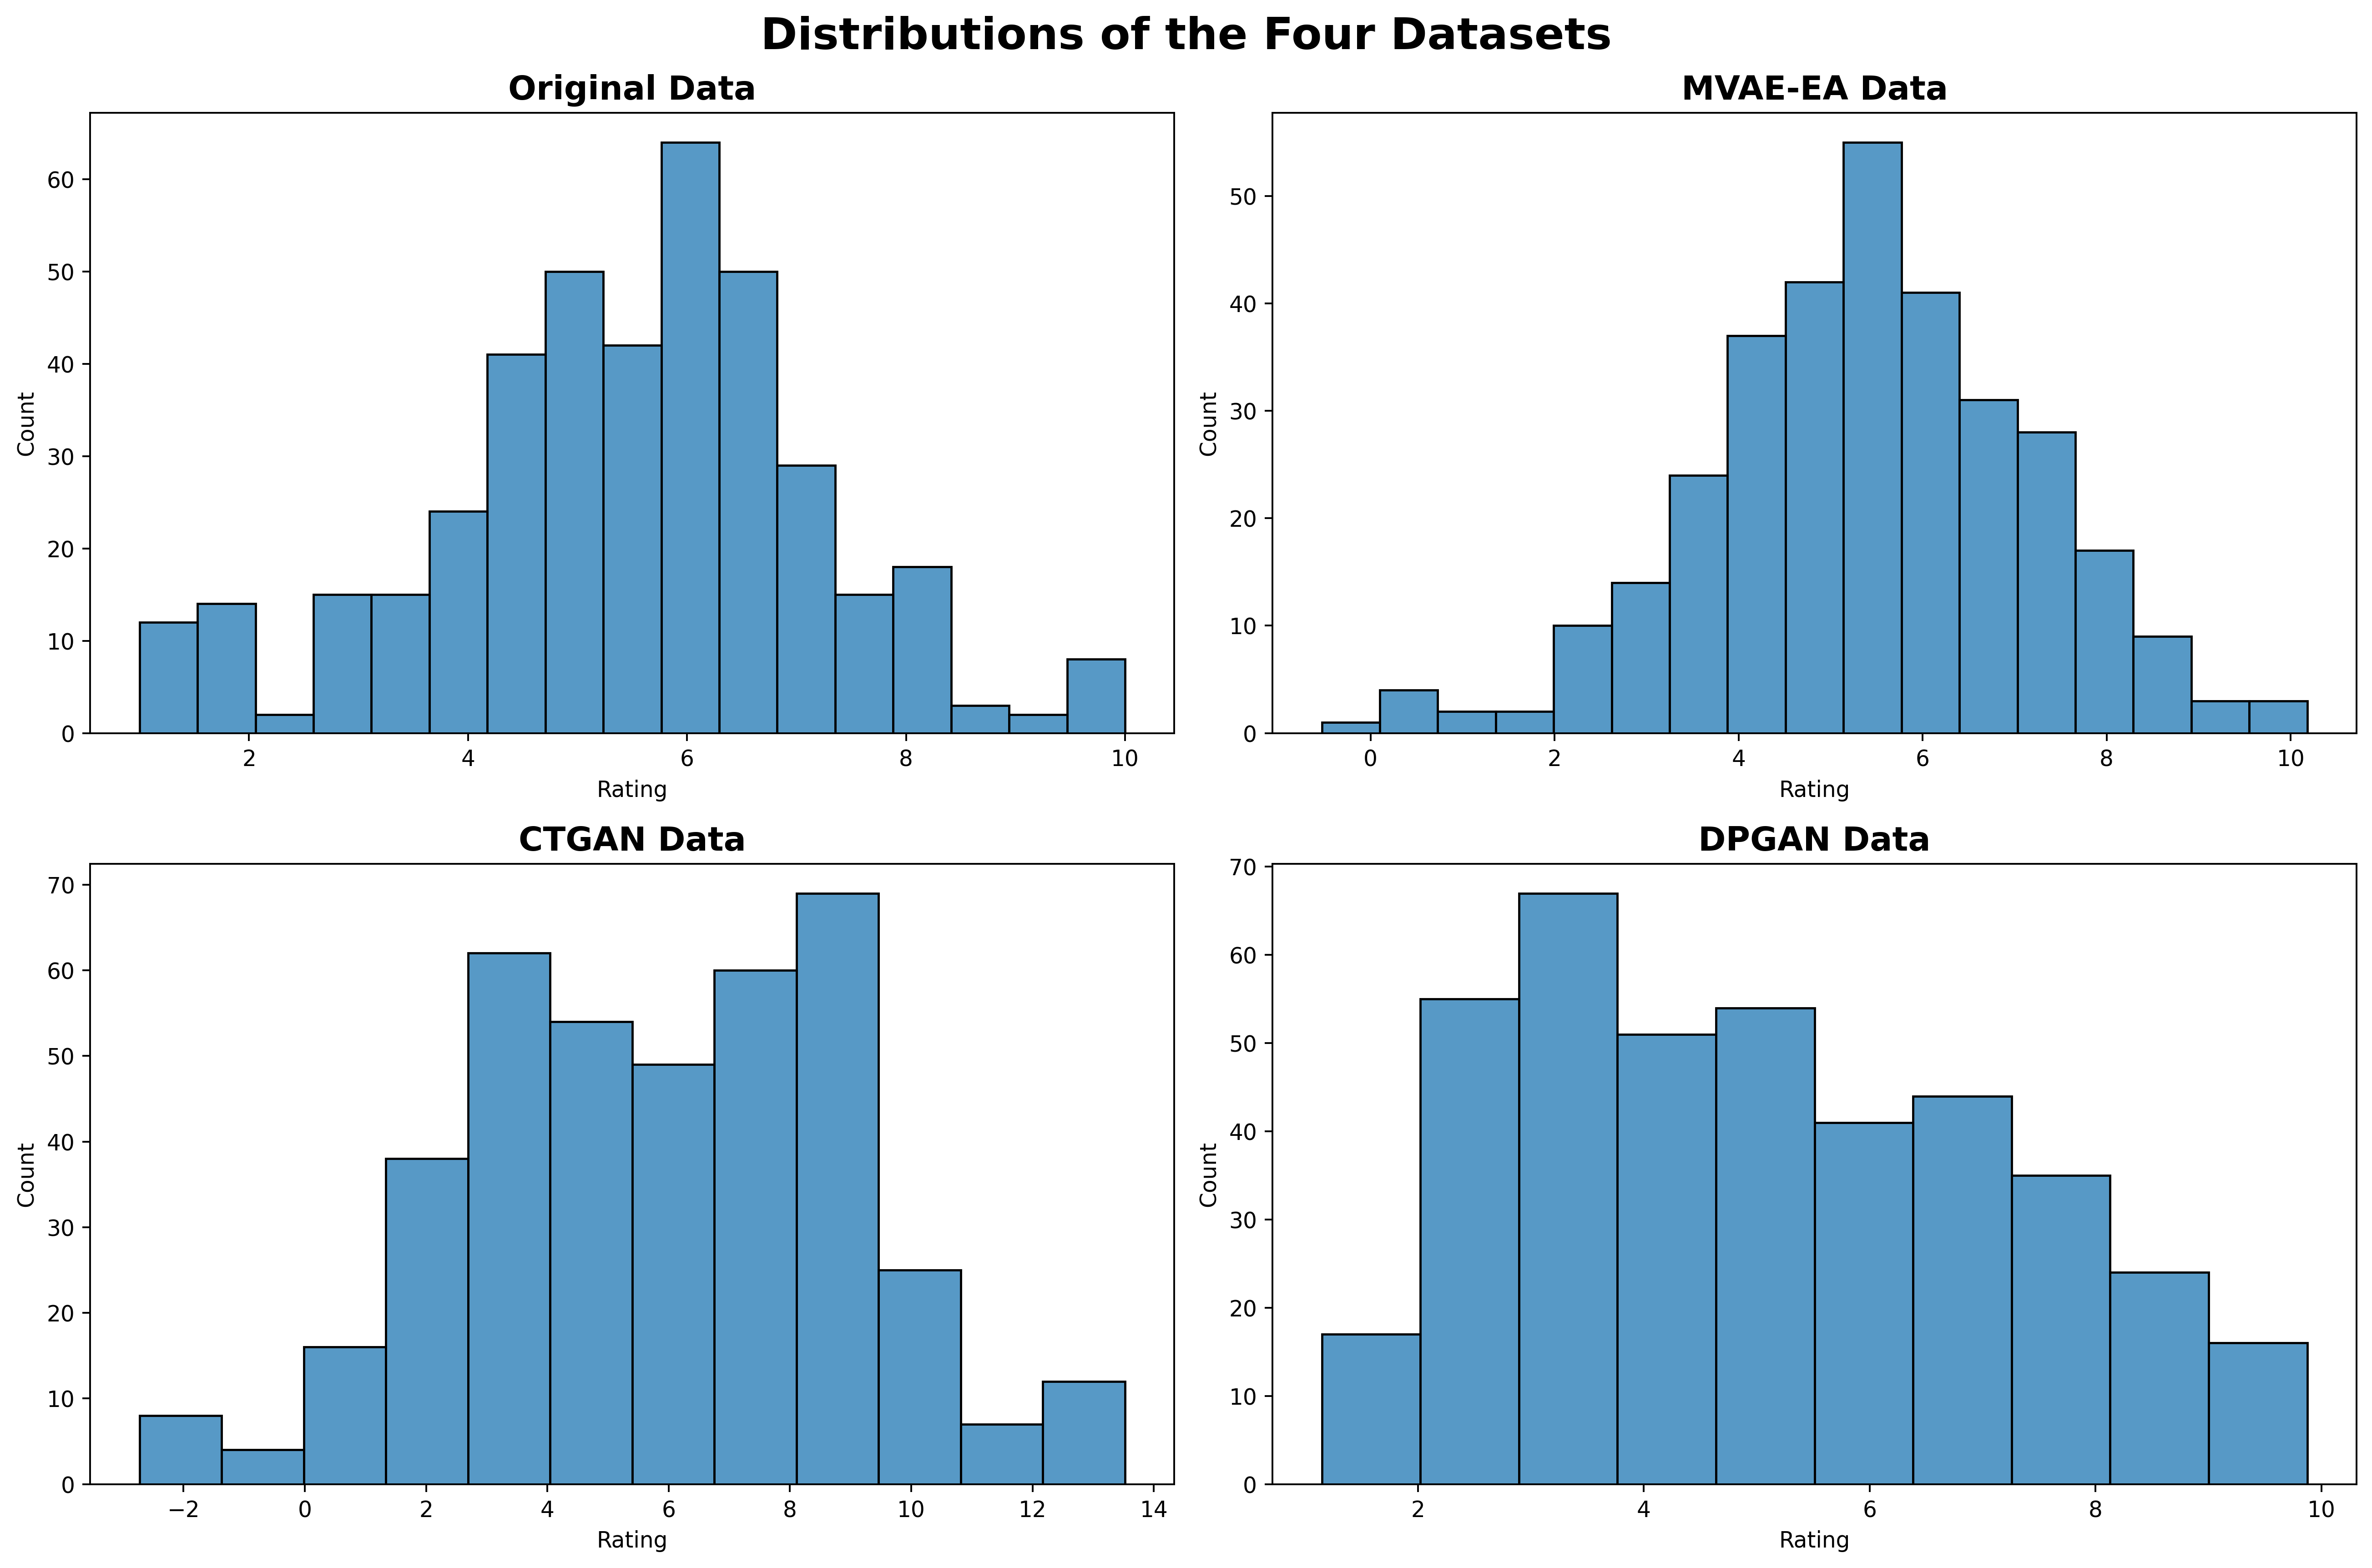

In [55]:
# visualising the disrtibutions of the four datasets above

fig, axes = plt.subplots(2, 2, figsize=(15, 10), dpi = 350)

sns.histplot(original_df['Rating'], kde=False, ax=axes[0, 0], discrete=(False)) # SET ALL KDE TO FALSE
axes[0, 0].set_title('Original Data', fontsize=15, fontweight='bold')

sns.histplot(synthetic_df['Rating'], kde=False, ax=axes[0, 1], discrete=(False))
axes[0, 1].set_title('MVAE-EA Data', fontsize=15, fontweight='bold')

sns.histplot(CTGAN_df['Rating'], kde=False, ax=axes[1, 0], discrete=(False))
axes[1, 0].set_title('CTGAN Data', fontsize=15, fontweight='bold')

sns.histplot(DPGAN_df['Rating'], kde=False, ax=axes[1, 1], discrete=(False)) 
axes[1, 1].set_title('DPGAN Data', fontsize=15, fontweight='bold')

fig.suptitle('Distributions of the Four Datasets', fontsize=20, fontweight='bold')


plt.tight_layout()

plt.show()


In [58]:

from scipy.spatial.distance import jensenshannon
from scipy.stats import wasserstein_distance
from scipy.stats import ks_2samp

# function to compute JS divergence for continuous data by binning it 
def compute_js_divergence(series1, series2, bins=100):
    # compute the histograms
    hist1, bin_edges = np.histogram(series1, bins=bins, density=True)
    hist2, _ = np.histogram(series2, bins=bin_edges, density=True)
    
    # adding a small value to avoid log(0) issues
    hist1 = np.where(hist1 == 0, 1e-10, hist1)
    hist2 = np.where(hist2 == 0, 1e-10, hist2)
    

    js_divergence = jensenshannon(hist1, hist2)
    return js_divergence

# Kolmogorov-Smirnov test
print("Kolmogorov-Smirnov test:")
ks_statistic, ks_pvalue = ks_2samp(original_df['Rating'], synthetic_df['Rating'])
print("Original vs MVAE-EA - statistic:", ks_statistic, ", p-value:", ks_pvalue)

ks_statistic, ks_pvalue = ks_2samp(original_df['Rating'], CTGAN_df['Rating'])
print("Original vs CTGAN - statistic:", ks_statistic, ", p-value:", ks_pvalue)

ks_statistic, ks_pvalue = ks_2samp(synthetic_df['Rating'], CTGAN_df['Rating'])
print("MVAE-EA vs CTGAN - statistic:", ks_statistic, ", p-value:", ks_pvalue)

ks_statistic, ks_pvalue = ks_2samp(original_df['Rating'], DPGAN_df['Rating'])
print("Original vs DPGAN - statistic:", ks_statistic, ", p-value:", ks_pvalue)

# Jensen-Shannon divergence
print("\nJensen-Shannon divergence:")
js_divergence = compute_js_divergence(original_df['Rating'], synthetic_df['Rating'])
print("Original vs MVAE-EA:", js_divergence)

js_divergence = compute_js_divergence(original_df['Rating'], CTGAN_df['Rating'])
print("Original vs CTGAN:", js_divergence)

js_divergence = compute_js_divergence(synthetic_df['Rating'], CTGAN_df['Rating'])
print("MVAE-EA vs CTGAN:", js_divergence)

js_divergence = compute_js_divergence(original_df['Rating'], DPGAN_df['Rating'])
print("Original vs DPGAN:", js_divergence)

# Wasserstein distance 
print("\nWasserstein distance:")
wasserstein_dist = wasserstein_distance(original_df['Rating'], synthetic_df['Rating'])
print("Original vs MVAE-EA:", wasserstein_dist)

wasserstein_dist = wasserstein_distance(original_df['Rating'], CTGAN_df['Rating'])
print("Original vs CTGAN:", wasserstein_dist)

wasserstein_dist = wasserstein_distance(synthetic_df['Rating'], CTGAN_df['Rating'])
print("MVAE-EA vs CTGAN:", wasserstein_dist)

wasserstein_dist = wasserstein_distance(original_df['Rating'], DPGAN_df['Rating'])
print("Original vs DPGAN:", wasserstein_dist)


Kolmogorov-Smirnov test:
Original vs MVAE-EA - statistic: 0.0715369524568556 , p-value: 0.2981622613748197
Original vs CTGAN - statistic: 0.2698019801980198 , p-value: 2.4314626229346404e-13
MVAE-EA vs CTGAN - statistic: 0.2505670845722343 , p-value: 2.059082178209743e-10
Original vs DPGAN - statistic: 0.22524752475247525 , p-value: 2.1553554487854264e-09

Jensen-Shannon divergence:
Original vs MVAE-EA: 0.3443203912330367
Original vs CTGAN: 0.47542819699118116
MVAE-EA vs CTGAN: 0.3603834982343465
Original vs DPGAN: 0.44689676993124283

Wasserstein distance:
Original vs MVAE-EA: 0.17414495345279368
Original vs CTGAN: 1.3477452751610852
MVAE-EA vs CTGAN: 1.3369111564470633
Original vs DPGAN: 0.6623683613861386


# Text Evaluation

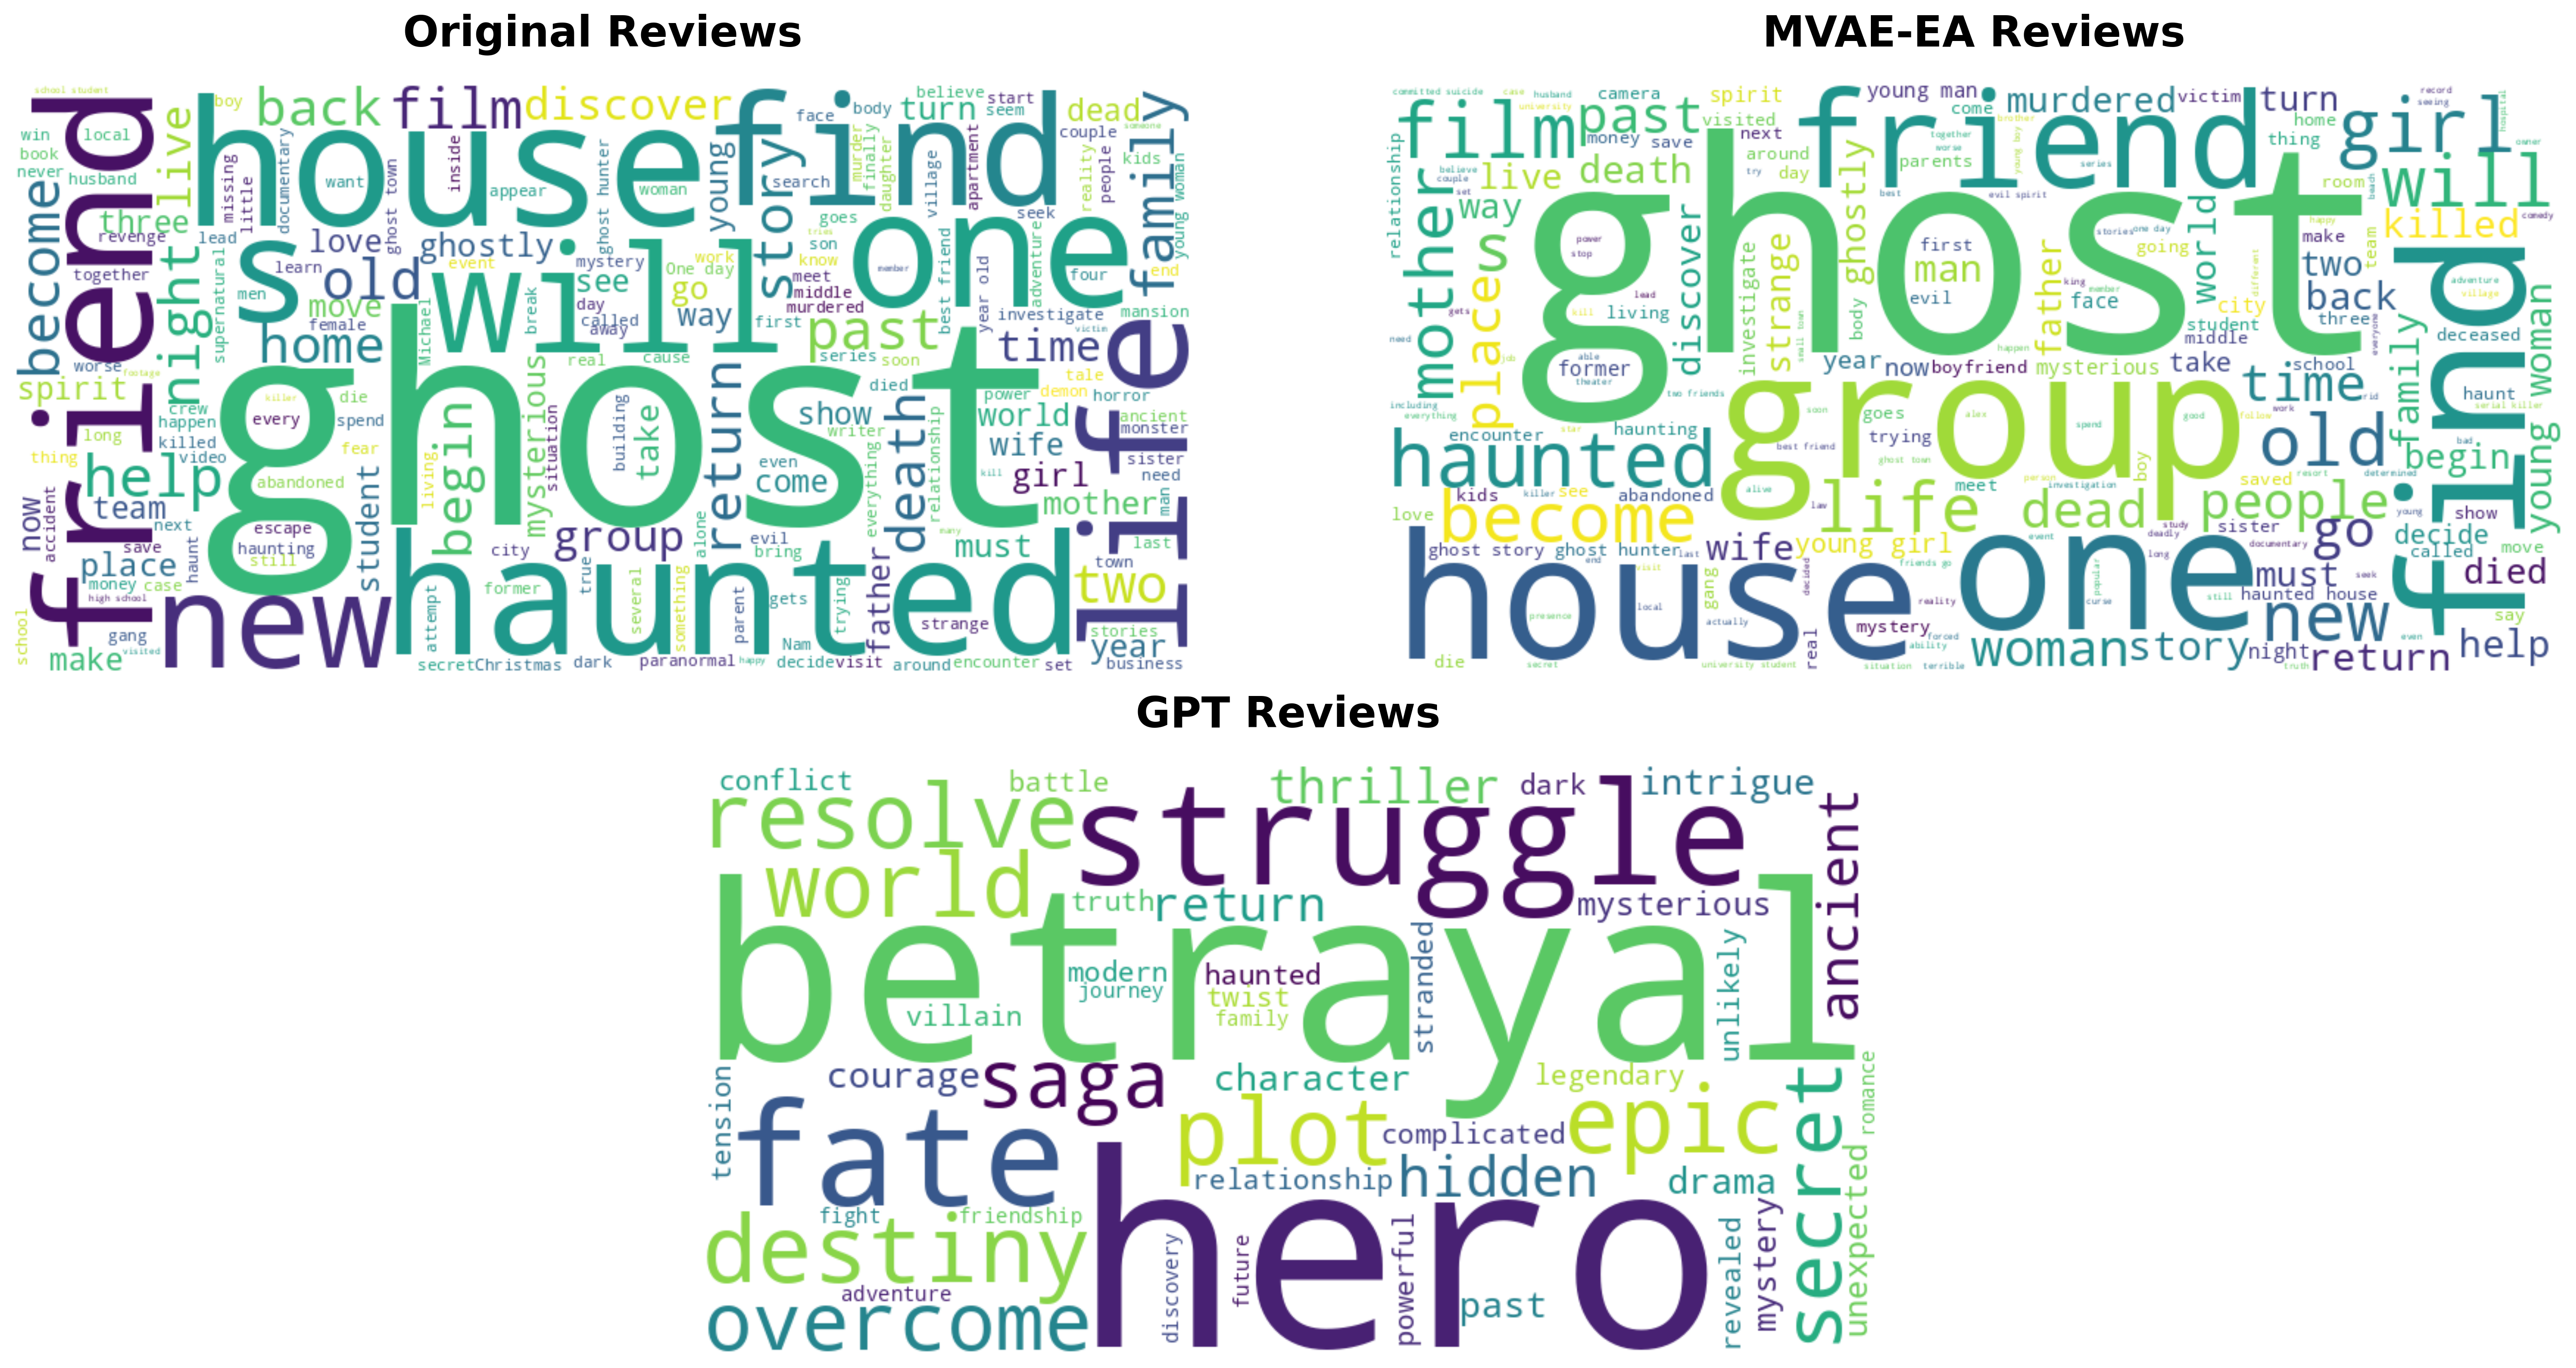

In [63]:

from wordcloud import WordCloud, STOPWORDS

# combining all reviews into a single string for each dataframe
original_text = ' '.join(original_df['Review'].astype(str))
synthetic_text = ' '.join(synthetic_df['Review'].astype(str))
GPT_text = ' '.join(GPT_df['Review'].astype(str))

# create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["said", "would", "could", "br"])  # Add more common words to exclude

# generate the word clouds
wordcloud_original = WordCloud(width=800, height=400, stopwords=stopwords, background_color='white').generate(original_text)
wordcloud_synthetic = WordCloud(width=800, height=400, stopwords=stopwords, background_color='white').generate(synthetic_text)
wordcloud_GPT = WordCloud(width=800, height=400, stopwords=stopwords, background_color='white').generate(GPT_text)



plt.figure(figsize=(20, 10), dpi=300)
plt.subplot(2, 2, 1)
plt.imshow(wordcloud_original, interpolation='bilinear')
plt.title('Original Reviews', fontsize=22, fontweight='bold', pad=20)
plt.axis('off')

plt.subplot(2, 2, 2)  
plt.imshow(wordcloud_synthetic, interpolation='bilinear')
plt.title('MVAE-EA Reviews', fontsize=22, fontweight='bold', pad=20)
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(wordcloud_GPT, interpolation='bilinear')
plt.title('GPT Reviews', fontsize=22, fontweight='bold', pad=20)
plt.axis('off')

plt.tight_layout()
plt.show()


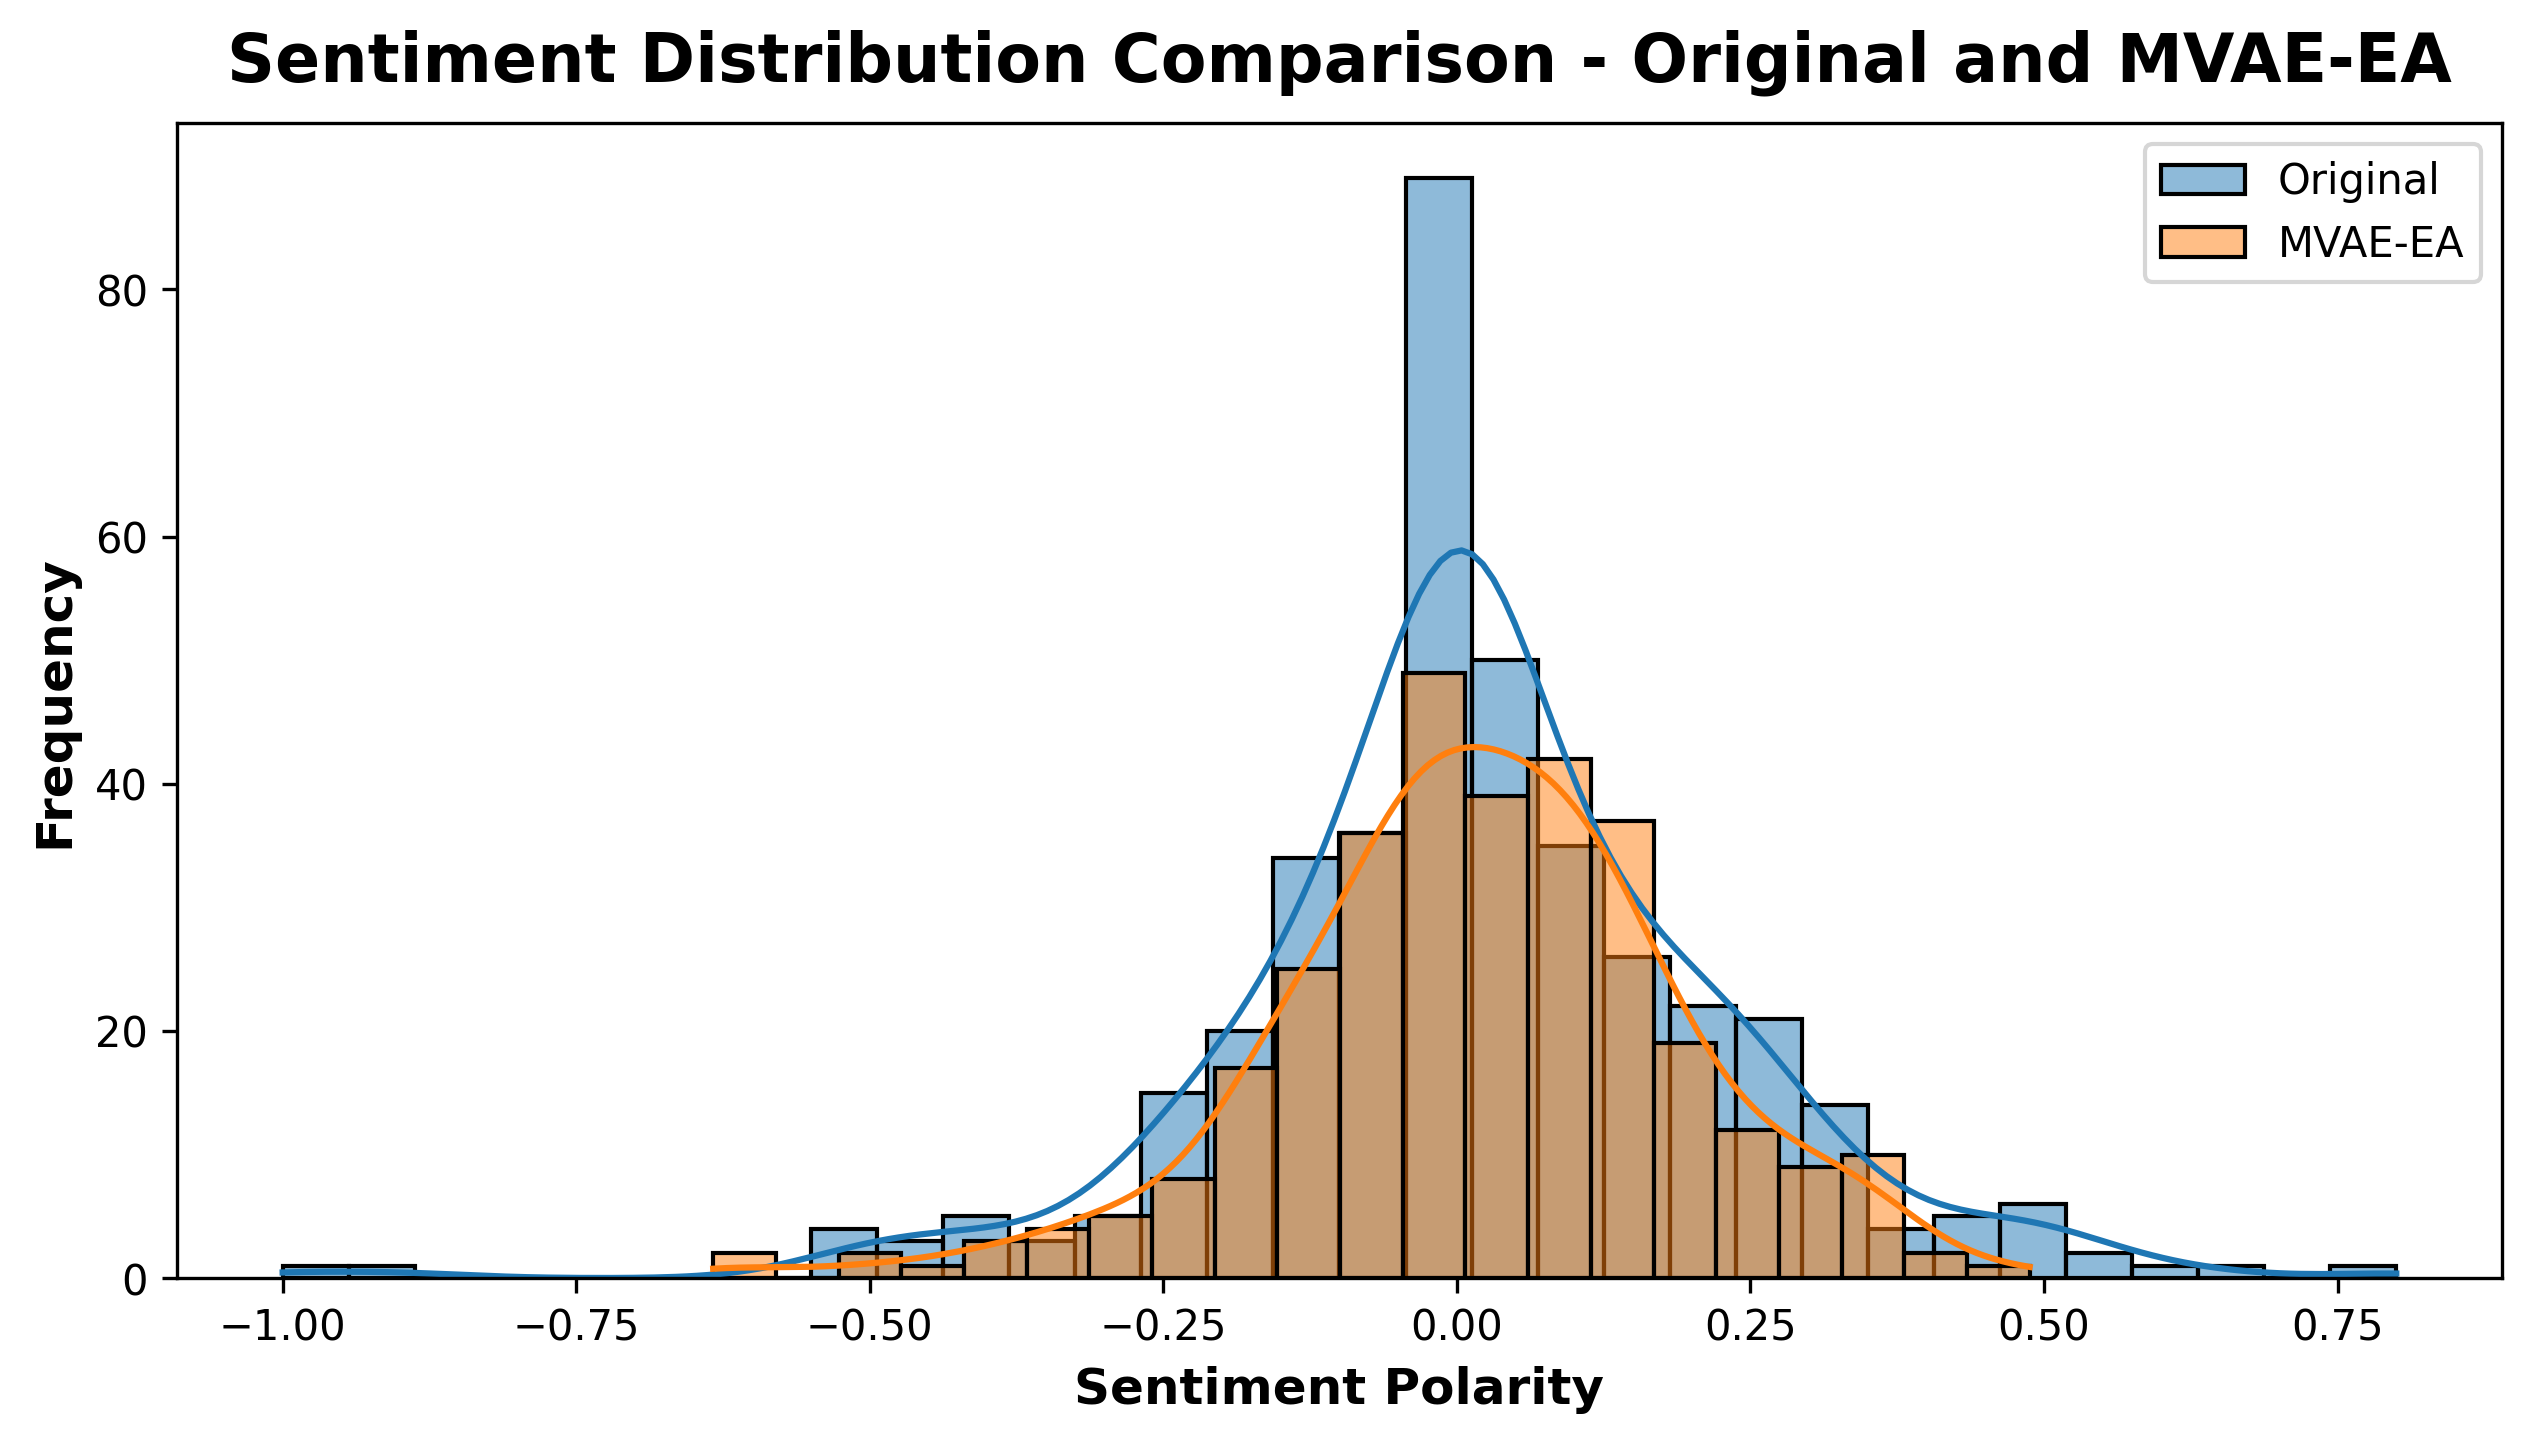

In [86]:
from textblob import TextBlob

original_sentiments = [TextBlob(review).sentiment.polarity for review in original_df['Review']]

synthetic_sentiments = [TextBlob(review).sentiment.polarity for review in synthetic_df['Review']]

plt.figure(figsize=(10, 5), dpi=300)
sns.histplot(original_sentiments, label='Original', kde=True)
sns.histplot(synthetic_sentiments, label='MVAE-EA', kde=True)
plt.xlabel('Sentiment Polarity', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Sentiment Distribution Comparison - Original and MVAE-EA', fontsize=16, fontweight='bold', pad=10)
plt.legend()
plt.show()


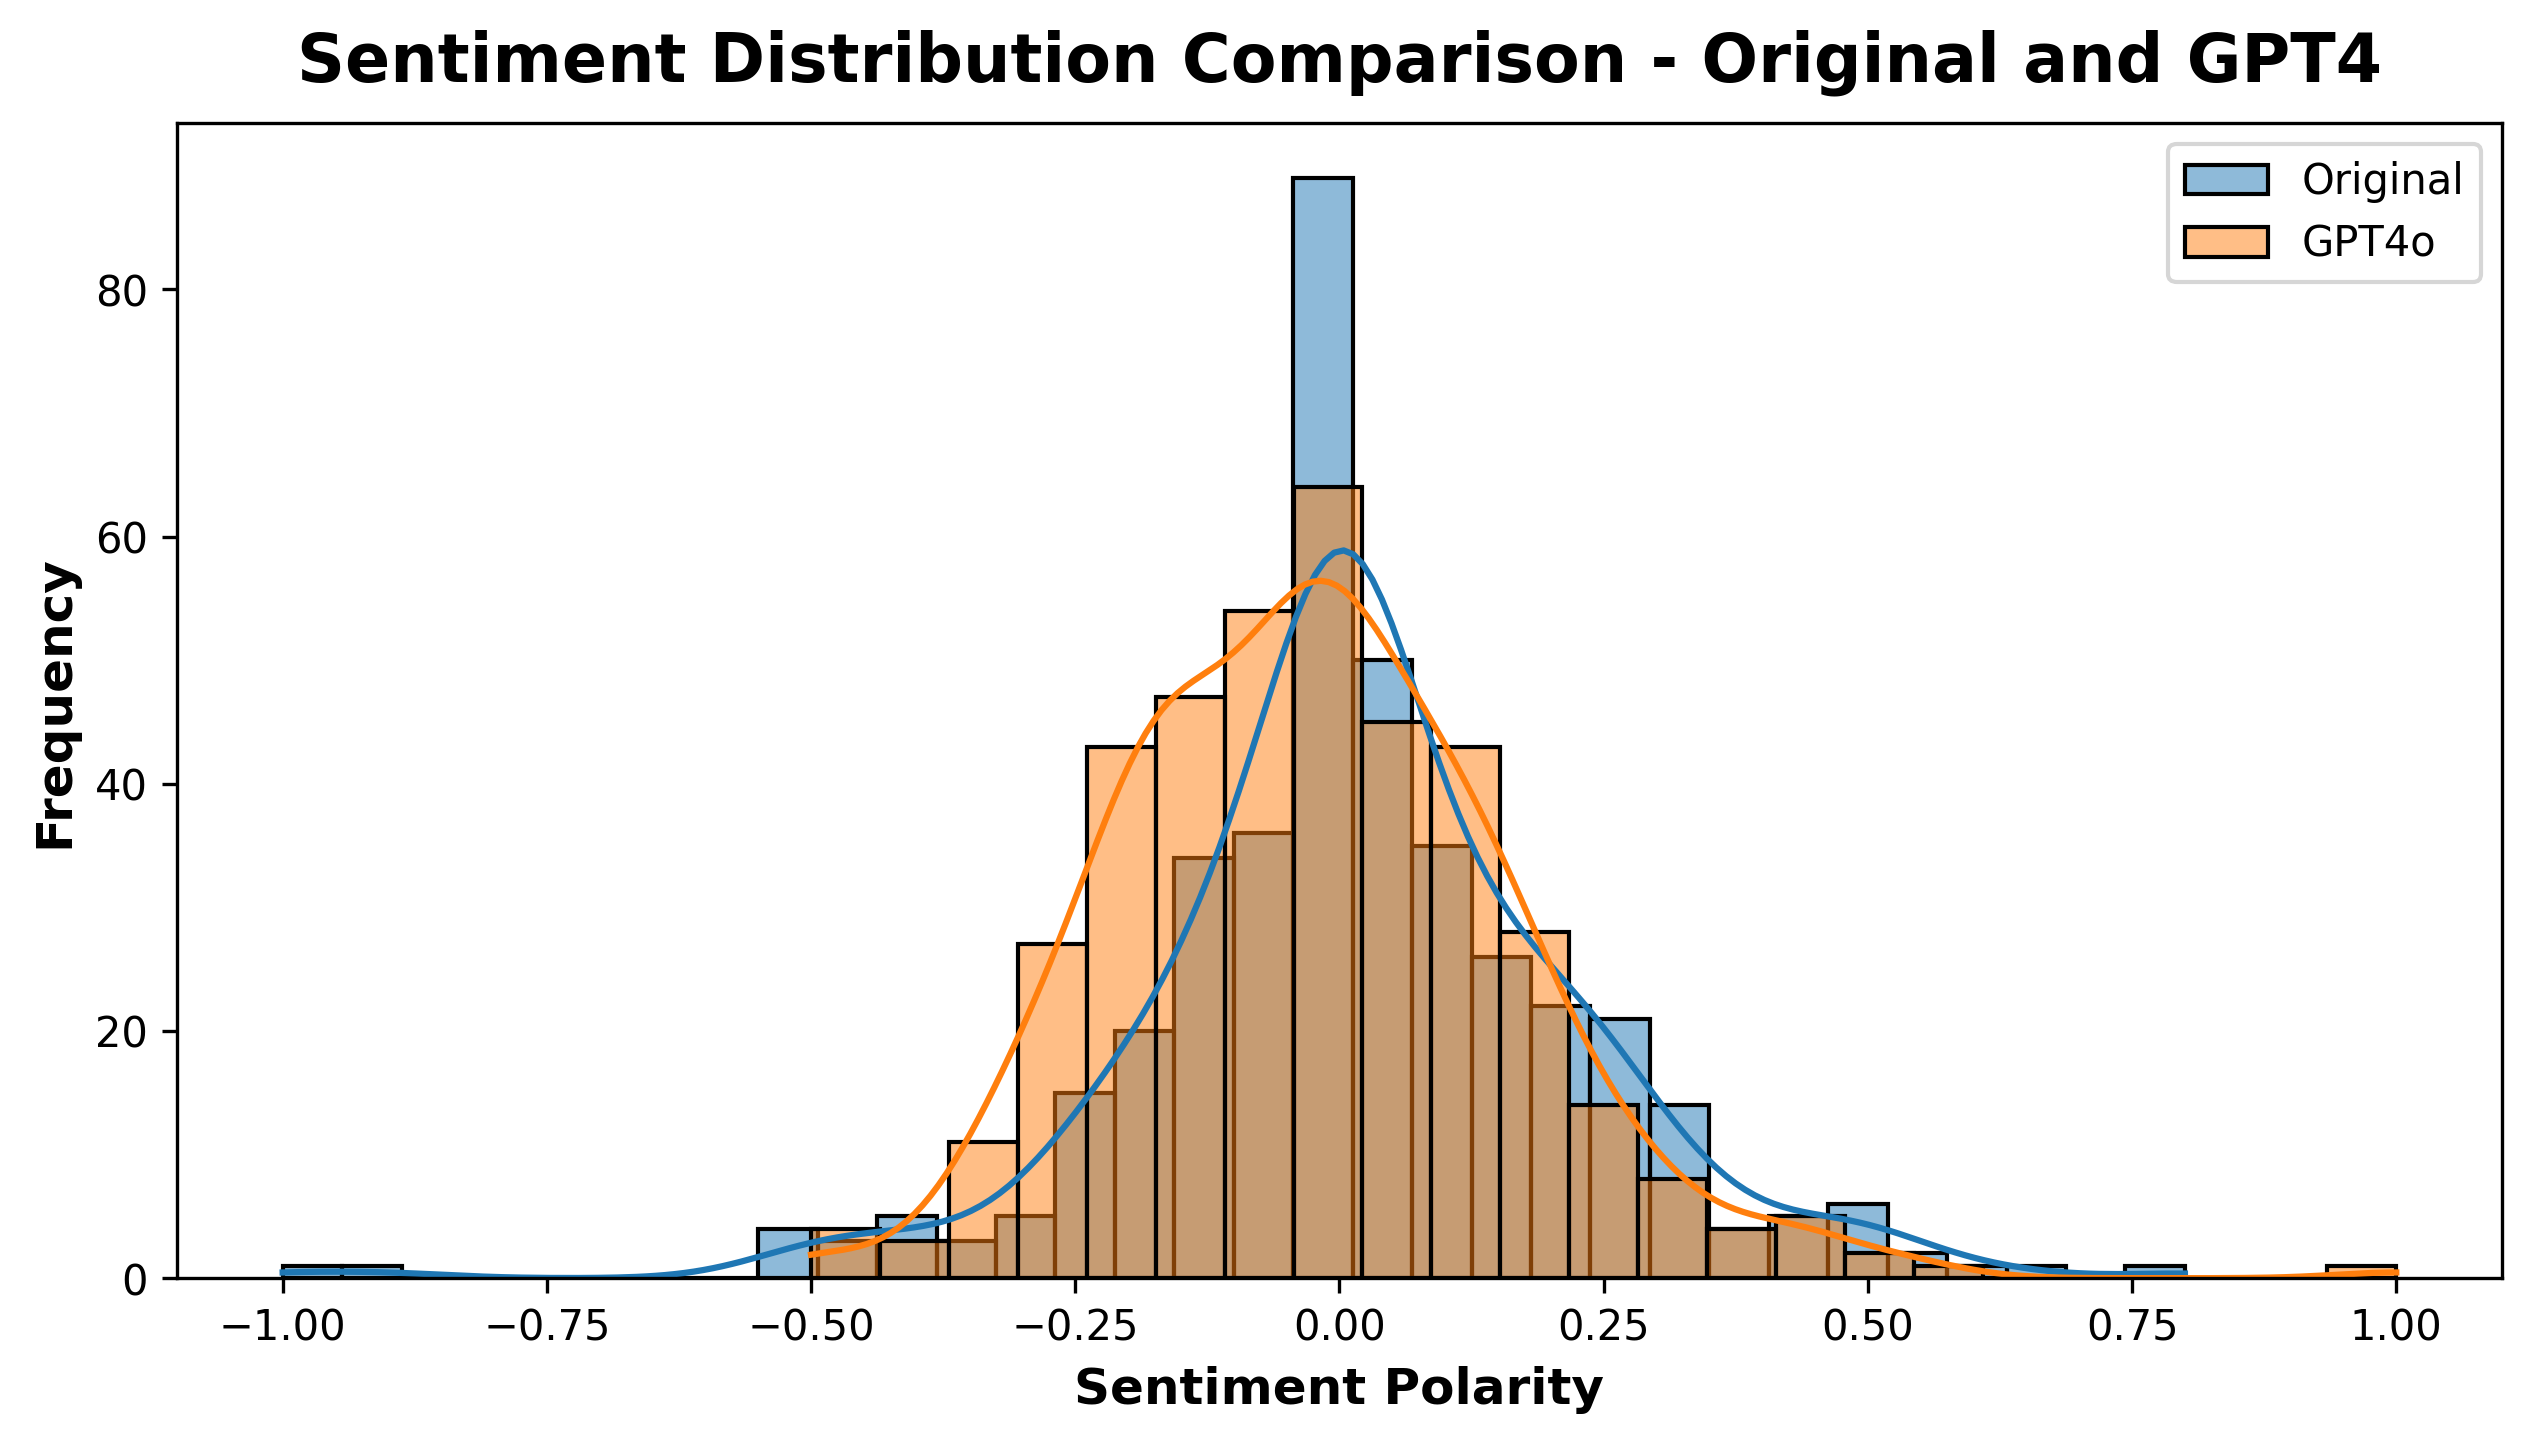

In [87]:
from textblob import TextBlob

original_sentiments = [TextBlob(review).sentiment.polarity for review in original_df['Review']]

GPT_sentiment = [TextBlob(review).sentiment.polarity for review in GPT_df['Review']]

plt.figure(figsize=(10, 5), dpi=300)
sns.histplot(original_sentiments, label='Original', kde=True)
sns.histplot(GPT_sentiment, label='GPT4o', kde=True)
plt.xlabel('Sentiment Polarity', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Sentiment Distribution Comparison - Original and GPT4', fontsize=16, fontweight='bold', pad=10)
plt.legend()
plt.show()


In [50]:
# Topic Modelling:
# Latent Dirichlet Allocation (LDA) on both datasets
# comparind topic distributions and coherence scores

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora
from gensim.models import CoherenceModel

# preprocess the text data
def preprocess_text(text):
  tokens = word_tokenize(text.lower())
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words and word.isalnum()]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return tokens


original_docs = [preprocess_text(review) for review in original_df['Review']]
synthetic_docs = [preprocess_text(review) for review in synthetic_df['Review']]

# create the dictionaries and corpora
original_dictionary = corpora.Dictionary(original_docs)
original_corpus = [original_dictionary.doc2bow(doc) for doc in original_docs]

synthetic_dictionary = corpora.Dictionary(synthetic_docs)
synthetic_corpus = [synthetic_dictionary.doc2bow(doc) for doc in synthetic_docs]

# train LDA models
num_topics = 5  # Adjust as needed
original_lda = gensim.models.LdaModel(original_corpus, num_topics=num_topics, id2word=original_dictionary, passes=15)
synthetic_lda = gensim.models.LdaModel(synthetic_corpus, num_topics=num_topics, id2word=synthetic_dictionary, passes=15)

# print topics
print("Original LDA Topics:")
for topic in original_lda.print_topics():
  print(topic)

print("\nSynthetic LDA Topics:")
for topic in synthetic_lda.print_topics():
  print(topic)

# compute coherence scores
original_coherence = CoherenceModel(model=original_lda, texts=original_docs, dictionary=original_dictionary, coherence='c_v').get_coherence()
synthetic_coherence = CoherenceModel(model=synthetic_lda, texts=synthetic_docs, dictionary=synthetic_dictionary, coherence='c_v').get_coherence()

print("\nOriginal Coherence Score:", original_coherence)
print("MVAE-EA Coherence Score:", synthetic_coherence)


[nltk_data] Downloading package punkt to /home/thomas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/thomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/thomas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original LDA Topics:
(0, '0.023*"ghost" + 0.007*"family" + 0.006*"haunted" + 0.006*"find" + 0.006*"life" + 0.005*"new" + 0.005*"one" + 0.005*"young" + 0.004*"year" + 0.004*"house"')
(1, '0.027*"ghost" + 0.009*"story" + 0.007*"student" + 0.006*"life" + 0.006*"friend" + 0.005*"school" + 0.005*"death" + 0.004*"new" + 0.004*"day" + 0.004*"film"')
(2, '0.016*"ghost" + 0.007*"year" + 0.005*"old" + 0.005*"girl" + 0.003*"woman" + 0.003*"team" + 0.003*"must" + 0.003*"love" + 0.003*"mother" + 0.003*"past"')
(3, '0.027*"ghost" + 0.008*"one" + 0.007*"house" + 0.006*"friend" + 0.005*"life" + 0.004*"get" + 0.004*"go" + 0.004*"spirit" + 0.004*"work" + 0.004*"girl"')
(4, '0.026*"ghost" + 0.007*"house" + 0.006*"friend" + 0.005*"story" + 0.005*"home" + 0.005*"two" + 0.005*"find" + 0.004*"soon" + 0.004*"haunted" + 0.004*"go"')

Synthetic LDA Topics:
(0, '0.028*"ghost" + 0.009*"friend" + 0.008*"house" + 0.007*"find" + 0.007*"two" + 0.007*"killed" + 0.006*"man" + 0.006*"wife" + 0.006*"woman" + 0.006*"mothe

In [51]:
# Latent Semantic Analysis (LSA)
# Word Mover's Distance (WMD)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.models import Word2Vec
import ot

# preprocess text data (same function as before)
def preprocess_text(text):
  tokens = word_tokenize(text.lower())
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words and word.isalnum()]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return tokens

original_docs = [preprocess_text(review) for review in original_df['Review']]
synthetic_docs = [preprocess_text(review) for review in synthetic_df['Review']]

# Latent Semantic Analysis (LSA)

# vectorise the preprocessed reviews
vectorizer = TfidfVectorizer()
original_tfidf = vectorizer.fit_transform([' '.join(doc) for doc in original_docs])
synthetic_tfidf = vectorizer.transform([' '.join(doc) for doc in synthetic_docs])

# apply LSA
num_components = 50
lsa = TruncatedSVD(n_components=num_components)
original_lsa = lsa.fit_transform(original_tfidf)
synthetic_lsa = lsa.transform(synthetic_tfidf)

# calculate cosine similarity between LSA representations
from sklearn.metrics.pairwise import cosine_similarity
lsa_similarity = cosine_similarity(original_lsa, synthetic_lsa).mean()
print("Average LSA Cosine Similarity:", lsa_similarity)

# Word Mover's Distance (WMD)

# training the Word2Vec model on combined corpus
combined_docs = original_docs + synthetic_docs
word2vec_model = Word2Vec(sentences=combined_docs, vector_size=100, window=5, min_count=1, workers=4)

# computing the WMD for each pair of original and synthetic reviews
wmd_distances = []
for i in range(min(len(original_docs), len(synthetic_docs))):
  wmd_distances.append(word2vec_model.wv.wmdistance(original_docs[i], synthetic_docs[i]))

# get the average WMD
average_wmd = sum(wmd_distances) / len(wmd_distances)
print("Average Word Mover's Distance:", average_wmd)


2024-08-27 00:51:18.697317: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-27 00:51:18.762418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 00:51:18.800094: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 00:51:18.813903: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-27 00:51:18.857180: I tensorflow/core/platform/cpu_feature_guar

Average LSA Cosine Similarity: 0.17091063260164743
Average Word Mover's Distance: 0.44589828216068944
